In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import numpy as np

from matplotlib.patches import Polygon

import pandas as pd

import matplotlib.pyplot as plt

In [3]:
from colonists import (get_nodes, get_hex_paths, get_hexes, assign_region_hex_indexes,
                       shuffle_regions, DEFAULT_MAP, plot_hexes, get_hex_roll_order,
                       assign_collect_index, get_hex_links, mark_port_nodes)

--------------------------------------------------

# Initial hex layout

 - Arrange land hexes in random order.
 - Arrange port hexes in random order, interleaved with sea hexes
   (one sea hex between each pair of port hexes).


In [4]:
df_nodes = get_nodes(8, 17, .165, 1.75)
df_hex_paths = get_hex_paths(df_nodes)

hex_count = df_hex_paths.hex.unique().max() + 1
df_hexes = get_hexes(hex_count, DEFAULT_MAP, port_offset=1)
assign_region_hex_indexes(df_hexes, inplace=True)

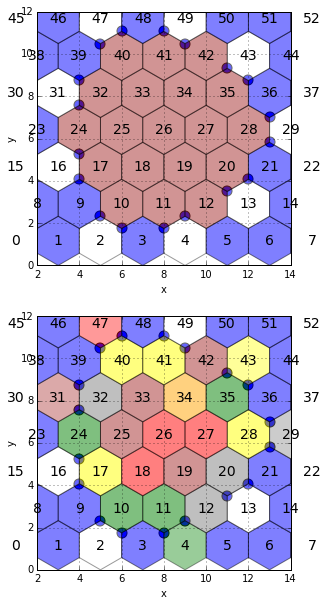

In [5]:
shuffle_regions(df_hexes, inplace=True)
mark_port_nodes(df_nodes, df_hexes, df_hex_paths, inplace=True)
fig, axes = plt.subplots(2, figsize=(8, 10))
plot_hexes(df_nodes, df_hexes, colorby='region', axis=axes[0])
plot_hexes(df_nodes, df_hexes, colorby='terrain', axis=axes[1])

--------------------------------------------------

# Active port hex vertices [done]

 - Find the pair of nodes associated with each port.
     * Some port hexes may have more than two vertices (i.e., nodes)
       contacting adjacent land hexes.  In such cases, according to
       the rules, only two nodes must be selected, which are on the
       side of the hex port facing the most (i.e., 4 instead of 3)
       land hexes.
 - Implemented in `mark_port_nodes` function.

--------------------------------------------------

# Dice roll number assignments [done]

 - Assign a dice roll number to each land hex
 - Implemented in `get_hex_roll_order` and `assign_collect` functions.

0 3


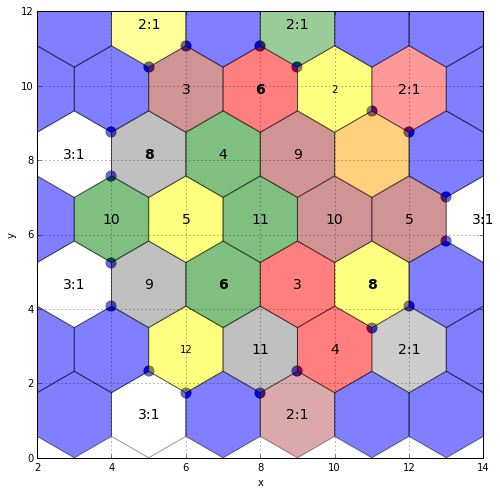

In [7]:
clockwise = np.random.randint(2)
shift = np.random.randint(0, 6)
print clockwise, shift

shuffle_regions(df_hexes, inplace=True)
mark_port_nodes(df_nodes, df_hexes, df_hex_paths, inplace=True)
assign_region_hex_indexes(df_hexes, inplace=True)

hex_roll_order = get_hex_roll_order(shift=shift, clockwise=clockwise)
assign_collect_index(df_hexes, hex_roll_order, inplace=True)

fig, axis = plt.subplots(figsize=(8, 10))
plot_hexes(df_nodes, df_hexes, colorby='terrain', axis=axis,
           labelby='collect_index')